In [137]:
import numpy as np

import matplotlib.pyplot as plt

from linear_regression import SimpleLinearRegressionAM, SimpleLinearRegressionGD, MultipleLinearRegressionAM, MultipleLinearRegressionGD, MultipleLinearRegressionSGD, RegularizedLinearRegressionGD
from regression_metrics import MSE, R2

## 1. Implemente os seguintes métodos

### a. Regressão Linear univariada - método analítico

In [138]:
X_train, y_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), np.array([
        3, 5, 7, 9, 11, 13, 15, 17, 19, 21])
X_test, y_test = np.array([11, 12, 13, 14, 15]), np.array([23, 25, 27, 29, 31])

model = SimpleLinearRegressionAM()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([23., 25., 27., 29., 31.])

### b. Regressão Linear univariada - gradiente descendente

In [139]:
X_train, y_train = np.array([1., 2., 3., 4., 5., 6., 7., 8., 9., 10.]), np.array([
        3., 5., 7., 9., 11., 13., 15., 17., 19., 21.])
X_test, y_test = np.array([11., 12., 13., 14., 15.]), np.array([23., 25., 27., 29., 31.])

model = SimpleLinearRegressionGD(learning_rate=0.01, ages=8918)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([23., 25., 27., 29., 31.])

### c. Regressão Linear multivariada – método analítico (não esquecer de adicionar termo de bias)

In [140]:
X_train, y_train = np.array([[1, 2, 3], [4, 5, 6],
                        [7, 8, 9], [10, 11, 12]]), np.array([15, 33, 51, 69])
X_test, y_test = np.array([[11, 12, 13], [14, 15, 16]]), np.array([75, 93])

model = MultipleLinearRegressionAM()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([75., 93.])

### d. Regressão Linear multivariada – gradiente descendente

In [141]:
X_train, y_train = np.array([[1, 2, 3], [4, 5, 6],
                        [7, 8, 9], [10, 11, 12]]), np.array([15, 33, 51, 69])
X_test, y_test = np.array([[11, 12, 13], [14, 15, 16]]), np.array([75, 93])

model = MultipleLinearRegressionGD(ages=3165)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([75., 93.])

### e. Regressão Linear multivariada – gradiente descendente estocástico

In [142]:
X_train, y_train = np.array([[1, 2, 3], [4, 5, 6],
                        [7, 8, 9], [10, 11, 12]]), np.array([15, 33, 51, 69])
X_test, y_test = np.array([[11, 12, 13], [14, 15, 16]]), np.array([75, 93])

model = MultipleLinearRegressionSGD(ages=5522)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([75., 93.])

### f. Regressão quadrática usando regressão múltipla

In [143]:
class SquareRegression(MultipleLinearRegressionAM):
    def fit(self, X, y):
        square_X = np.power(X, 2)
        _X = np.c_[X, square_X]

        super().fit(_X, y)

    def predict(self, x):
        square_x = np.power(x, 2)
        _x = np.c_[x, square_x]

        return super().predict(_x)


X_train, y_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), np.array([
        1, 4, 9, 16, 25, 36, 49, 64, 81, 100])
X_test, y_test = np.array([11, 12, 13, 14, 15]), np.array([121, 144, 169, 196, 225])

model = SquareRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([121., 144., 169., 196., 225.])

### g. Regressão cúbica usando regressão múltipla

In [144]:
class CubicRegression(MultipleLinearRegressionAM):
    def fit(self, X, y):
        square_X = np.power(X, 2)
        cubic_X = np.power(X, 3)
        _X = np.c_[X, square_X, cubic_X]

        super().fit(_X, y)

    def predict(self, x):
        square_x = np.power(x, 2)
        cubic_x = np.power(x, 3)
        _x = np.c_[x, square_x, cubic_x]

        return super().predict(_x)


X_train, y_train = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10]), np.array(
        [1, 8, 27, 64, 125, 216, 343, 512, 729, 1000])
X_test, y_test = np.array([11, 12, 13, 14, 15]), np.array(
    [1331, 1728, 2197, 2744, 3375])

model = CubicRegression()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([1331.        , 1728.        , 2197.        , 2744.        ,
       3375.00000001])

### h. Regressão Linear Regularizada multivariada – gradiente descendente

In [145]:
X_train, y_train = np.array([[1, 2, 3], [4, 5, 6],
                        [7, 8, 9], [10, 11, 12]]), np.array([15, 33, 51, 69])
X_test, y_test = np.array([[11, 12, 13], [14, 15, 16]]), np.array([75, 93])

model = RegularizedLinearRegressionGD(learning_rate=0.001, ages=23796, regularization_rate=0)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

y_predict

array([75., 93.])

## 2. Implemente as funções

### a. MSE(y_true, y_predict)

In [146]:
y_true, y_predict = np.array([23., 25., 26., 30., 31.]), np.array([23., 25., 27., 29., 31.])

MSE(y_true, y_predict)

0.4

### b. R2(y_true, y_predict)

In [147]:
y_true, y_predict = np.array([23., 25., 26., 30., 31.]), np.array([23., 25., 27., 29., 31.])

R2(y_true, y_predict)

0.9565217391304348

## 3. Carregue o conjunto de dados Boston House Price Dataset (https://archive.ics.uci.edu/ml/machine-learning-databases/housing/). Nesse link também contém a descrição dos atributos

In [148]:
dataset = np.loadtxt('./datasets/housing.data')

dataset

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

### 4. Vamos analisar apenas a variável LSTAT como atributo preditor e a variável MEDV como atributo alvo

In [149]:
dataset = dataset[:, 12:]

dataset

array([[ 4.98, 24.  ],
       [ 9.14, 21.6 ],
       [ 4.03, 34.7 ],
       ...,
       [ 5.64, 23.9 ],
       [ 6.48, 22.  ],
       [ 7.88, 11.9 ]])

### 5. Embaralhe as amostras com seus valores alvo. Divida o conjunto de dados em 80% para treino e 20% para teste.

In [150]:
np.random.shuffle(dataset)

X = dataset[:, 0]
y = dataset[:, 1]


def my_train_test_split(X, y, test_size):
    n_train = int(np.shape(y)[0] * (1 - test_size))
    
    return X[:n_train], X[n_train:], y[:n_train], y[n_train:]

                  
X_train, X_test, y_train, y_test = my_train_test_split(X, y, 0.2)

### 6. Para cada um dos métodos a, b, f e g da questão 1 faça o seguinte:

#### a. Reporte MSE e R2 score para o conjunto de treino e o de teste

##### Regressão Linear univariada - método analítico

In [151]:
linear_regression_am = SimpleLinearRegressionAM()
linear_regression_am.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, linear_regression_am.predict(X_train)))
print('R2:', R2(y_train, linear_regression_am.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, linear_regression_am.predict(X_test)))
print('R2:', R2(y_test, linear_regression_am.predict(X_test)))

>> Treino
MSE: 40.17522824138334
R2: 0.5317432055201835
>> Teste
MSE: 31.92289645716162
R2: 0.5887876560748249


##### Regressão Linear univariada - gradiente descendente

In [152]:
linear_regression_gd = SimpleLinearRegressionGD(learning_rate=0.001, ages=50000)
linear_regression_gd.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, linear_regression_gd.predict(X_train)))
print('R2:', R2(y_train, linear_regression_gd.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, linear_regression_gd.predict(X_test)))
print('R2:', R2(y_test, linear_regression_gd.predict(X_test)))

>> Treino
MSE: 40.17522825608101
R2: 0.5317432053488769
>> Teste
MSE: 31.922694566111502
R2: 0.5887902567189126


##### Regressão quadrática usando regressão múltipla

In [153]:
square_regression = SquareRegression()
square_regression.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, square_regression.predict(X_train)))
print('R2:', R2(y_train, square_regression.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, square_regression.predict(X_test)))
print('R2:', R2(y_test, square_regression.predict(X_test)))

>> Treino
MSE: 30.84205889019682
R2: 0.6405246649923197
>> Teste
MSE: 28.861963851827024
R2: 0.6282168248197636


##### Regressão cúbica usando regressão múltipla

In [154]:
cubic_regression = CubicRegression()
cubic_regression.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, cubic_regression.predict(X_train)))
print('R2:', R2(y_train, cubic_regression.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, cubic_regression.predict(X_test)))
print('R2:', R2(y_test, cubic_regression.predict(X_test)))

>> Treino
MSE: 29.681592572326718
R2: 0.6540503190307432
>> Teste
MSE: 26.154336757515804
R2: 0.6630949157041903


#### b. Reporte os coeficientes

##### Regressão Linear univariada - método analítico

In [155]:
print('b0:', linear_regression_am.b_0)
print('b1:', linear_regression_am.b_1)

b0: 34.889825961053376
b1: -0.9728804233585685


##### Regressão Linear univariada - gradiente descendente

In [156]:
print('b0:', linear_regression_gd.b_0)
print('b1:', linear_regression_gd.b_1)

b0: 34.889577285071816
b1: -0.9728651627965097


##### Regressão quadrática usando regressão múltipla

In [157]:
print('b0:', square_regression.b[0])
print('b1:', square_regression.b[1])
print('b2:', square_regression.b[2])

b0: 44.00315693488261
b1: -2.492538799921874
b2: 0.04823384436706467


##### Regressão cúbica usando regressão múltipla

In [158]:
print('b0:', cubic_regression.b[0])
print('b1:', cubic_regression.b[1])
print('b2:', cubic_regression.b[2])
print('b3:', cubic_regression.b[3])

b0: 49.29853178072161
b1: -3.900888152357739
b2: 0.14607886577572665
b3: -0.0018878407506090049


#### c. Comentar qual ficou melhor a partir das métricas de erro. Descrever a razão.

De acordo com as métricas de erro o melhor modelo de regressão foi a regressão cúbica. A razão para isso é que a relação entre as variáveis LSTAT e MEDV não é linear e é possívelmente cúbica.

### 7. Agora vamos analisar um segundo conjunto de dados. Carregue o conjunto de dados trab1_data.csv (o vetor alvo é a última coluna)

In [159]:
dataset = np.loadtxt('./datasets/trab1_data.txt')

X = dataset[:, :-1]
y = dataset[:, -1]

X_train, X_test, y_train, y_test = my_train_test_split(X, y, 0.2)

### 8. Para cada um dos métodos c, d, e e h (com λ=1) da questão 1 faça o seguinte:

#### a. Reporte MSE e R2 score para o conjunto de treino e o de teste

##### Regressão Linear multivariada – método analítico (não esquecer de adicionar termo de bias)

In [160]:
linear_regression_am = MultipleLinearRegressionAM()
linear_regression_am.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, linear_regression_am.predict(X_train)))
print('R2:', R2(y_train, linear_regression_am.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, linear_regression_am.predict(X_test)))
print('R2:', R2(y_test, linear_regression_am.predict(X_test)))

>> Treino
MSE: 0.38290282275552306
R2: 0.7754500901175807
>> Teste
MSE: 0.6251944229652509
R2: 0.2519883558419198


##### Regressão Linear multivariada – gradiente descendente

In [161]:
linear_regression_gd = MultipleLinearRegressionGD()
linear_regression_gd.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, linear_regression_gd.predict(X_train)))
print('R2:', R2(y_train, linear_regression_gd.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, linear_regression_gd.predict(X_test)))
print('R2:', R2(y_test, linear_regression_gd.predict(X_test)))

>> Treino
MSE: 0.8446572686768543
R2: 0.5046583563996923
>> Teste
MSE: 0.4099284393369045
R2: 0.5095425764656945


##### Regressão Linear multivariada – gradiente descendente estocástico

In [162]:
linear_regression_sgd = MultipleLinearRegressionSGD()
linear_regression_sgd.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, linear_regression_sgd.predict(X_train)))
print('R2:', R2(y_train, linear_regression_sgd.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, linear_regression_sgd.predict(X_test)))
print('R2:', R2(y_test, linear_regression_sgd.predict(X_test)))

>> Treino
MSE: 0.4814325103223304
R2: 0.7176682427427028
>> Teste
MSE: 0.5056560207189066
R2: 0.39500965212959926


##### Regressão Linear Regularizada multivariada – gradiente descendente

In [163]:
regularized_linear_regression_gd = RegularizedLinearRegressionGD(regularization_rate=1)
regularized_linear_regression_gd.fit(X_train, y_train)

print('>> Treino')
print('MSE:', MSE(y_train, regularized_linear_regression_gd.predict(X_train)))
print('R2:', R2(y_train, regularized_linear_regression_gd.predict(X_train)))

print('>> Teste')
print('MSE:', MSE(y_test, regularized_linear_regression_gd.predict(X_test)))
print('R2:', R2(y_test, regularized_linear_regression_gd.predict(X_test)))

>> Treino
MSE: 0.6523990118908628
R2: 0.6174064785596842
>> Teste
MSE: 0.5446987241038129
R2: 0.3482971485010389


#### b. Reporte os coeficientes

##### Regressão Linear multivariada – método analítico (não esquecer de adicionar termo de bias)

In [164]:
print('b:', linear_regression_am.b)

b: [ 0.90893125  2.09518349 -0.01984449 -1.1322022   0.05301581 -0.25919221]


##### Regressão Linear multivariada – gradiente descendente

In [165]:
print('b:', linear_regression_gd.b)

b: [0.14567432 0.34464373 0.47353521 0.17773758 0.19813187 0.25747072]


##### Regressão Linear multivariada – gradiente descendente estocástico

In [166]:
print('b:', linear_regression_sgd.b)

b: [0.07545829 0.93891418 0.19826959 0.33325624 0.10861063 0.22807532]


##### Regressão Linear Regularizada multivariada – gradiente descendente

In [167]:
print('b_0:', regularized_linear_regression_gd.b_0)
print('b_j:', regularized_linear_regression_gd.b_j)

b_0: 0.14349698371581232
b_j: [0.50639396 0.43258936 0.23169842 0.19798427 0.28348577]


#### c. Apenas para o método d e e, plote o MSE para cada época em um gráfico linha. Comente qual dos métodos converge mais rápido.

##### Regressão Linear multivariada – gradiente descendente

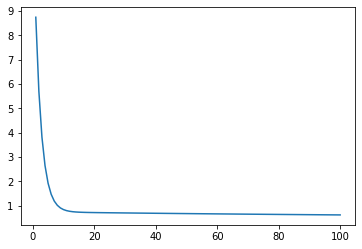

In [168]:
ages = []
MSEs = []

for i in range(1, 101):
    ages.append(i)
    
    linear_regression_gd = MultipleLinearRegressionGD(ages=i)
    linear_regression_gd.fit(X_train, y_train)
    
    MSEs.append(MSE(y_train, linear_regression_gd.predict(X_train)))
    
plt.plot(ages, MSEs)

##### Regressão Linear multivariada – gradiente descendente estocástico

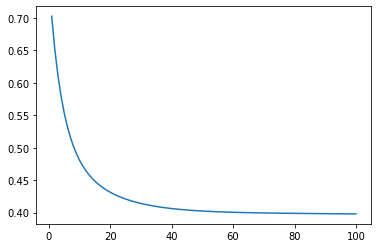

In [169]:
ages = []
MSEs = []

for i in range(1, 101):
    ages.append(i)
    
    linear_regression_sgd = MultipleLinearRegressionSGD(ages=i)
    linear_regression_sgd.fit(X_train, y_train)
    
    MSEs.append(MSE(y_train, linear_regression_sgd.predict(X_train)))
    
plt.plot(ages, MSEs)

O método de gradiente descendente não estocástico parece convergir (diminuição no erro) mais rápido

#### d. Apenas para o método h, plote o MSE para o conjunto de treino e o conjunto de teste (duas linhas) variando λ=1,2,3,4,5. Comente qual seria o valor de  mais adequado

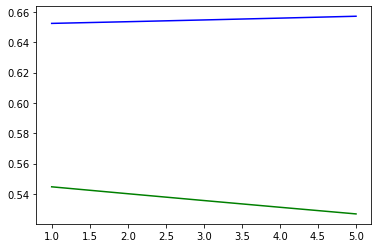

In [170]:
regularization_rate_values = []
MSE_values_train = []
MSE_values_test = []

for i in range(1, 6):
    regularization_rate_values.append(i)
    
    regularized_linear_regression_gd = RegularizedLinearRegressionGD(regularization_rate=i)
    regularized_linear_regression_gd.fit(X_train, y_train)
    
    MSE_values_train.append(MSE(y_train, regularized_linear_regression_gd.predict(X_train)))
    MSE_values_test.append(MSE(y_test, regularized_linear_regression_gd.predict(X_test)))
    
plt.plot(regularization_rate_values, MSE_values_train, color='blue')
plt.plot(regularization_rate_values, MSE_values_test, color='green')

O valor mais adequado parece ser 1 pois ao se aumentar o valor λ os erros nos conjuntos de treino e teste crescem.